# <b>boxplot<b>

Boxplots in <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> are modeled after the "Variability Chart" in JMP which provides convenient, multi-level group labels automatically along the x-axis.  Data can be broken into multiple subsets for easy visualization by simply listing the DataFrame column names of interest in the <font style="font-family:'Courier New'">groups</font> keyword.  At a minimum, the `boxplot` function requires the following keywords:
<ul>
<li>`df`: a pandas DataFrame</li>
<li>`y`: the name of the DataFrame column containing the y-axis data</li>
</ul>

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace

### Sample data

Read some fake boxplot data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_box.csv'))
df.head()

,Batch,Sample,Region,Value,ID
0,101,1,Alpha123,3.5,ID701223A
1,101,1,Alpha123,2.1,ID7700-1222B
2,101,1,Alpha123,3.3,ID701223A
3,101,1,Alpha123,3.2,ID7700-1222B
4,101,1,Alpha123,4.0,ID701223A


### Set theme

Optionally set the design theme

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## Groups

Consider the following boxplot of made-up data:

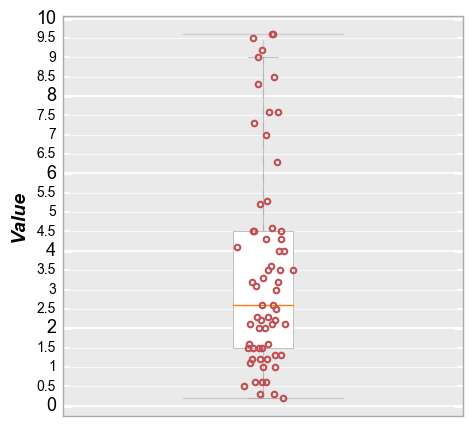

In [5]:
fcp.boxplot(df=df, y='Value', show=SHOW, tick_labels_minor=True, grid_minor=True)

### Single group

Rather than lumping the data into a single box, we can separate them into categories to get more information.  First, set a single group column of "Batch":

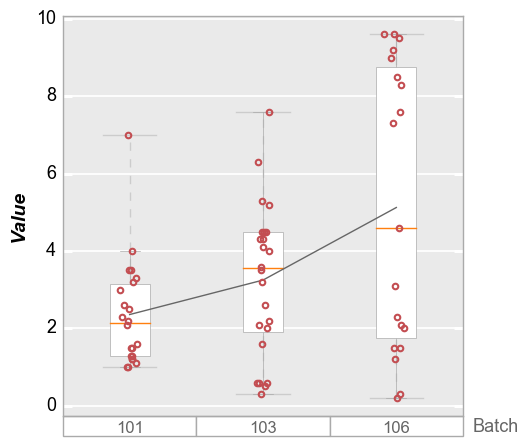

In [6]:
fcp.boxplot(df=df, y='Value', groups='Batch', show=SHOW)

### Multiple groups

We can dive deeper by specifying more than one value for <font style="font-family:'Courier New'">groups</font>:

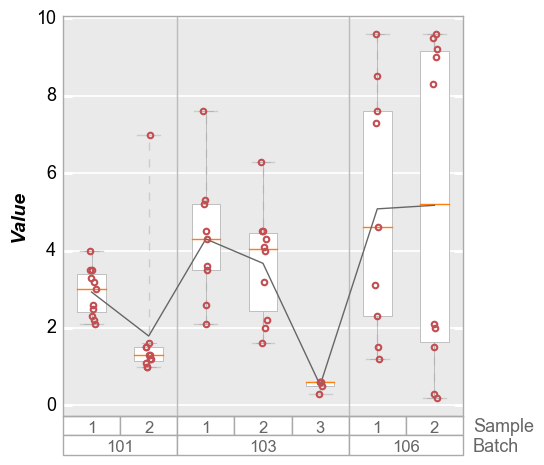

In [7]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'], show=SHOW, save=False)

### Groups + legend

Boxplots also support legending for another level of visualization:

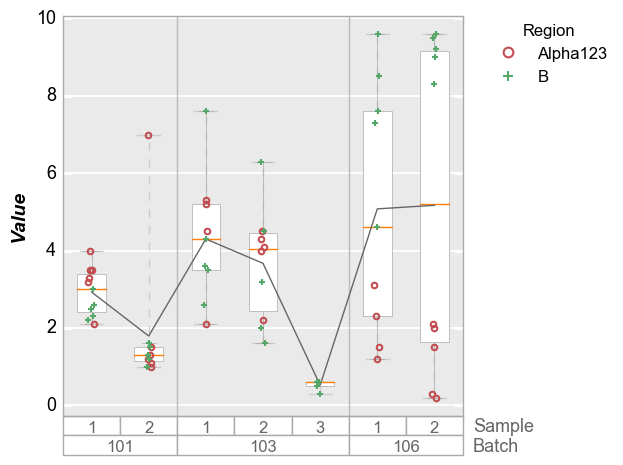

In [8]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'], legend='Region', show=SHOW)

## Grid plots

Like the <font style="font-family:'Courier New'">plot</font> function, boxplots can be broken into subplots based on "row" and/or "col" values or "wrap" values.

### Column plots

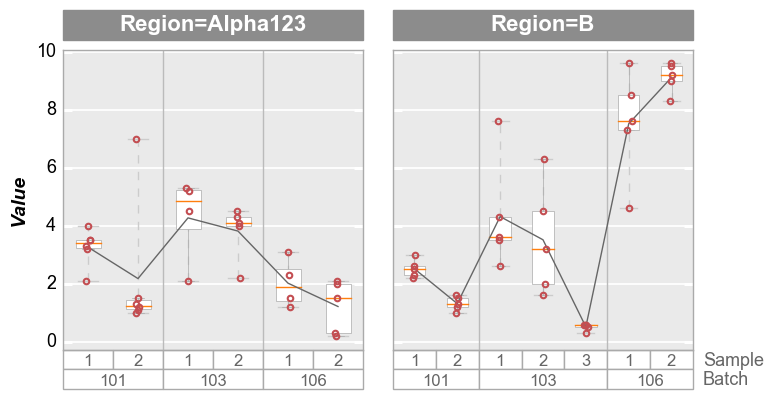

In [9]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'], col='Region', show=SHOW, ax_size=[300, 300])

### Row plots

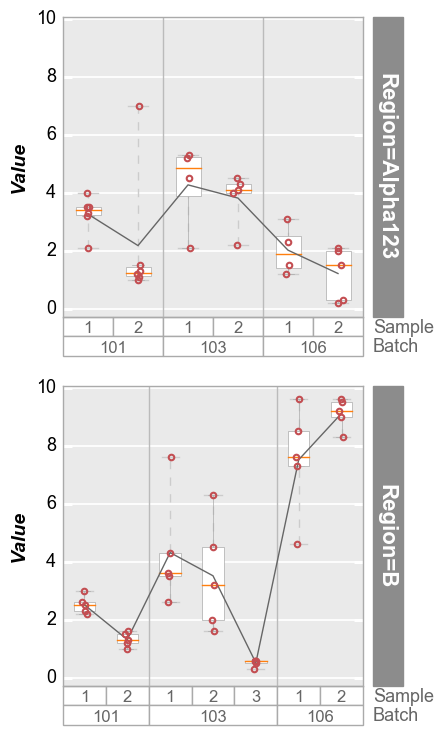

In [10]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'], row='Region', show=SHOW, ax_size=[300, 300])

### Wrap plots

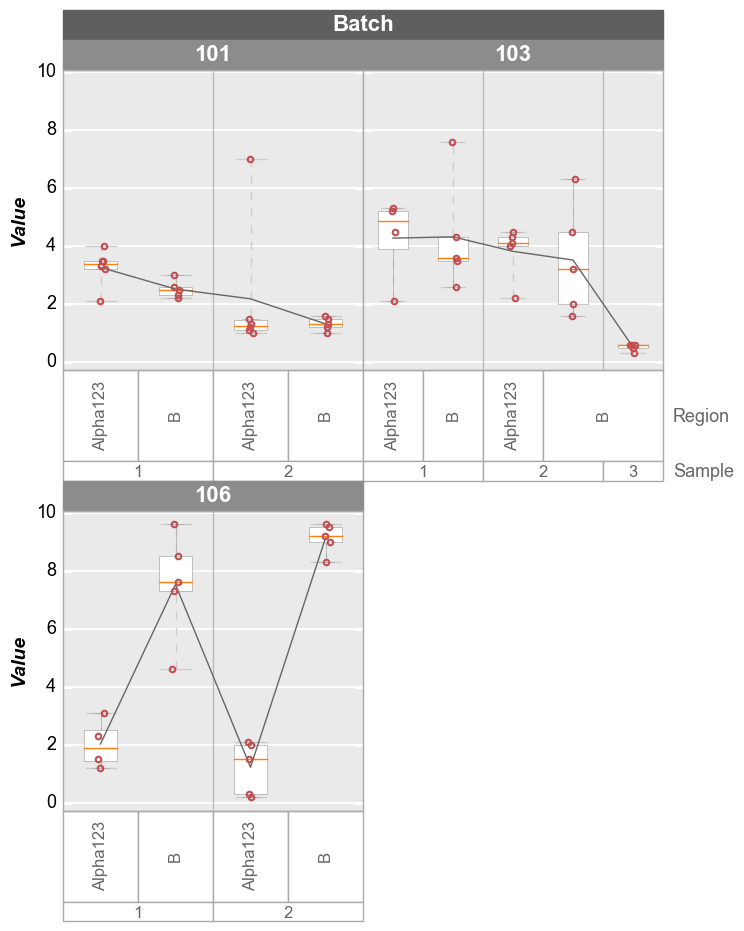

In [11]:
fcp.boxplot(df=df, y='Value', groups=['Sample', 'Region'], wrap='Batch', show=SHOW, ax_size=[300, 300])

Alternatively, we can wrap multiple `y` column values and create a unique subplot for each column:

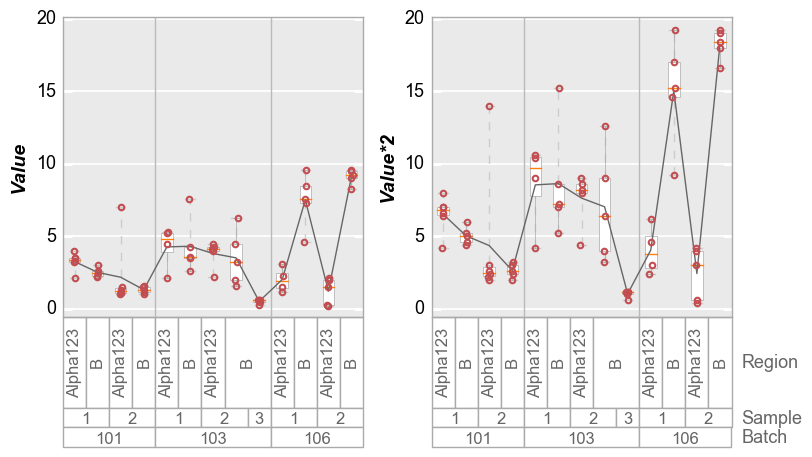

In [12]:
# Make a new y column
df['Value*2'] = 2*df['Value']

# Plot
fcp.boxplot(df=df, y=['Value', 'Value*2'], groups=['Batch', 'Sample', 'Region'], wrap='y', show=SHOW, 
            ax_size=[300, 300])

Or if we disable y-axis range sharing:

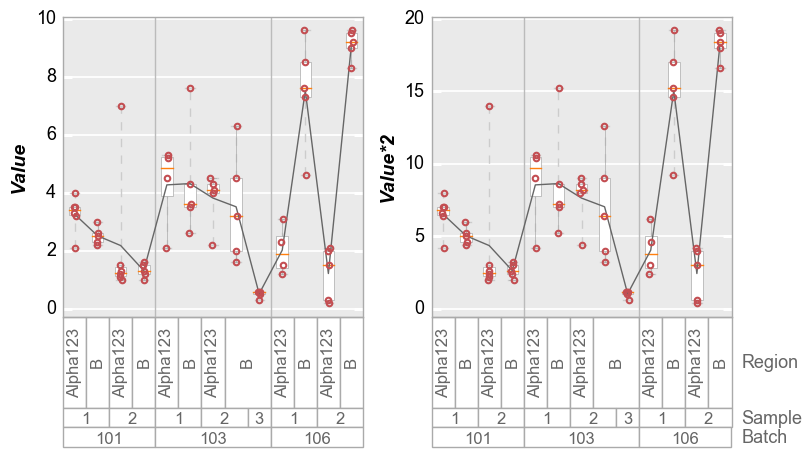

In [13]:
fcp.boxplot(df=df, y=['Value', 'Value*2'], groups=['Batch', 'Sample', 'Region'], wrap='y', show=SHOW, 
            ax_size=[300, 300], share_y=False)

## Other options

### Violins

The traditional boxes can be replaced by violins with kernal density estimates of the data distrubution.  Style attributes for the boxes will be applied to the violin plots.

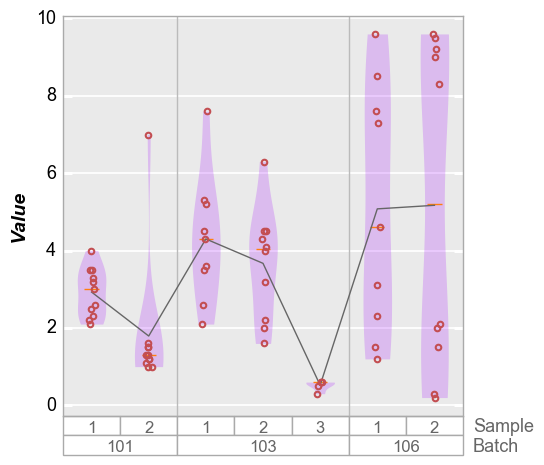

In [14]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'], show=SHOW, violin=True, 
            box_fill_color='#a000FF', box_fill_alpha=0.2, box_edge_width=0)

### Stat line

In addition to displaying boxes with a median line and interquartile ranges, a connecting line can be drawn between boxes at some statistical value.  By default, the line connects the mean value of each distribution but other DataFrame stat values can be selected.  The stat line accepts the typical styling keywords of any line object with the prefix `box_stat_line_` (i.e., `box_stat_line_color` or `box_stat_line_width`)

#### Mean

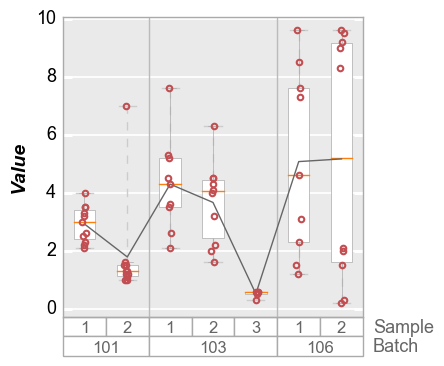

In [15]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'], show=SHOW, box_stat_line='mean', ax_size=[300, 300])

#### Median

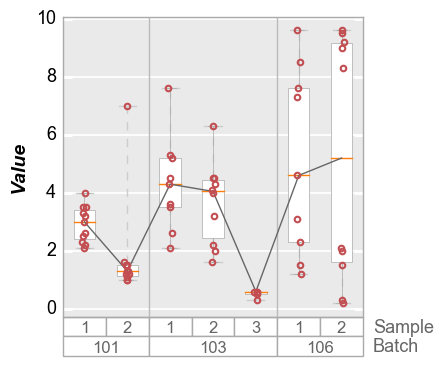

In [16]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'], show=SHOW, box_stat_line='median', ax_size=[300, 300])

#### Std dev

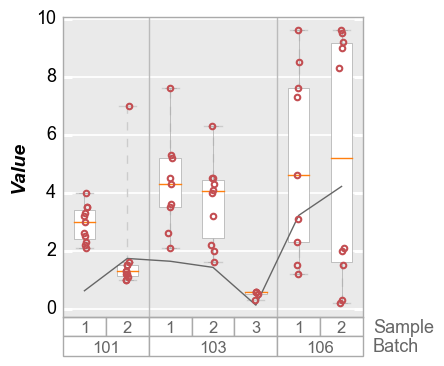

In [17]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'], show=SHOW, box_stat_line='std', ax_size=[300, 300])

### Dividers

Using the keyword `box_divider`, lines can be drawn on the boxplot to visually segrate main groups of boxes.  These lines are enabled by default but can be turned off easily:

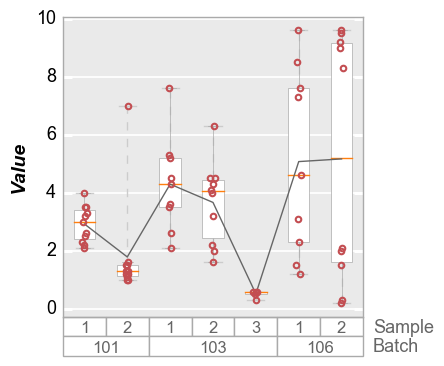

In [18]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'], show=SHOW, box_divider=False, ax_size=[300, 300])

### Range lines

Because outlier points by definition fall outside of the span of the box, we can draw lines that span the entire range of the data.  This is particularly useful to indicate when there are data points that fall outside of the limits of the y-axis.  These lines are enabled by default but can be disabled or styled through keywords with the prefix `box_range_lines_`:

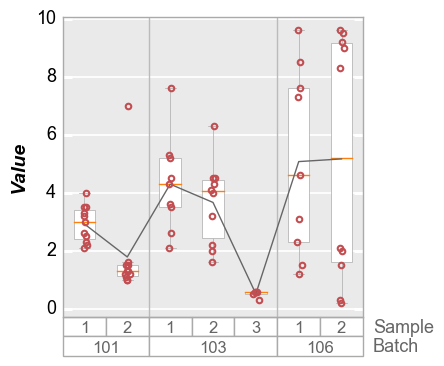

In [19]:
fcp.boxplot(df=df, y='Value', groups=['Batch', 'Sample'], show=SHOW, box_range_lines=False, ax_size=[300, 300])